# 4.10 Part 1

### This following script contains the following: 

1. Security Implications (PII)
2. Regional Segmentation

        a. Creating region column
        b. Spending Habbits by US region
        
3. Exclusion Flag
4. Customer Profiling

        a. Customer's age
        b. Customer's Income/ class
        c. Customer's dependents
        d. Creating customer profile
        e. Department to customer profile
        f. Loyalty customers
        g. Profile and orders day of week
        h. Profile hour of day
        i. Customer's by Regions
        
5. Aggregating Profiles 
6. Exporting Data 

In [1]:
# Importing libraries 

import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/tsique/Documents/Instacart Basket Analysis'

In [3]:
# Importing dataset

ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_pt1.pkl'))

# 01. Security Implications (PII)

In the previous script, before merging the customer dataset to ords_prods, customers first and last names were dropped from the dataset ensuring customer privacy. 

# 02. Regional Segmentation

In [4]:
# Checking output for columns and df shape

ords_prods_cust

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_orders,order_frequency_flag,gender,state,age,number_dependents,fam_status,income,_merge
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30328758,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,High spender,7.0,Frequent customer,Male,Hawaii,25,0,single,53755,both
30328759,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,High spender,7.0,Frequent customer,Male,Hawaii,25,0,single,53755,both
30328760,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,3,married,46151,both
30328761,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,3,married,46151,both


### a. Creating region column

In [5]:
# Create a region column
# Creating region: Northeast
# Using regions from https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

ords_prods_cust.loc[(ords_prods_cust['state'] == 'Maine') | (ords_prods_cust['state'] == 'New Hampshire') | (ords_prods_cust ['state'] == 'Vermont') | (ords_prods_cust['state'] == 'Massachusetts') | (ords_prods_cust['state'] == 'Rhode Island') | (ords_prods_cust['state'] == 'Connecticut') | (ords_prods_cust['state'] == 'New York') | (ords_prods_cust['state'] == 'Pennsylvania') | (ords_prods_cust['state'] == 'New Jersey'), 'region'] = 'Northeast'

In [6]:
# Creating region: Midwest

ords_prods_cust.loc[(ords_prods_cust['state'] == 'Wisconsin') | (ords_prods_cust['state'] == 'Michigan') | (ords_prods_cust['state'] == 'Illinois') | (ords_prods_cust['state'] == 'Indiana') | (ords_prods_cust['state'] == 'Ohio') | (ords_prods_cust['state'] == 'North Dakota') | (ords_prods_cust['state'] == 'South Dakota') | (ords_prods_cust['state'] == 'Nebraska') | (ords_prods_cust['state'] == 'Kansas') | (ords_prods_cust['state'] == 'Minnesota') | (ords_prods_cust['state'] == 'Iowa') | (ords_prods_cust['state'] == 'Missouri'), 'region'] = 'Midwest'

In [7]:
# Creating region: South

ords_prods_cust.loc[(ords_prods_cust['state'] == 'Delaware') | (ords_prods_cust['state'] == 'Maryland')| (ords_prods_cust['state'] == 'District of Columbia') | (ords_prods_cust['state'] == 'Virginia') | (ords_prods_cust['state'] == 'West Virginia') | (ords_prods_cust['state'] == 'North Carolina') | (ords_prods_cust['state'] == 'South Carolina') | (ords_prods_cust['state'] == 'Georgia') | (ords_prods_cust['state'] == 'Florida') | (ords_prods_cust['state'] == 'Arkansas') | (ords_prods_cust['state'] == 'Louisiana') | (ords_prods_cust['state'] == 'Kentucky') | (ords_prods_cust['state'] == 'Tennessee') | (ords_prods_cust['state'] == 'Mississippi') | (ords_prods_cust['state'] == 'Alabama') | (ords_prods_cust['state'] == 'Oklahoma') | (ords_prods_cust['state'] == 'Texas'), 'region'] = 'South'

In [8]:
# Creating region: West

ords_prods_cust.loc[(ords_prods_cust['state'] == 'Idaho') | (ords_prods_cust['state'] == 'Montana') | (ords_prods_cust['state'] == 'Wyoming') | (ords_prods_cust['state'] == 'Nevada') | (ords_prods_cust['state'] == 'Utah') | (ords_prods_cust['state'] == 'Colorado') | (ords_prods_cust['state'] == 'Arizona') | (ords_prods_cust['state'] == 'New Mexico') | (ords_prods_cust['state'] == 'Alaska') | (ords_prods_cust['state'] == 'Alaska') | (ords_prods_cust['state'] == 'Washington') | (ords_prods_cust['state'] == 'Oregon') | (ords_prods_cust['state'] == 'California') | (ords_prods_cust['state'] == 'Hawaii'), 'region'] = 'West'

In [9]:
# Checking results of regions

ords_prods_cust['region'].value_counts(dropna = False)

South        10099817
West          7765088
Midwest       7107586
Northeast     5356272
Name: region, dtype: int64

In [10]:
# Checking how many counts for each state

ords_prods_cust['state'].value_counts(dropna = False)

Pennsylvania            626003
California              619377
Rhode Island            616005
Georgia                 615535
New Mexico              613252
Arizona                 613146
North Carolina          611018
Oklahoma                610954
Alaska                  607402
Minnesota               606952
Massachusetts           606002
Wyoming                 603254
Virginia                600998
Missouri                600027
Texas                   599536
Colorado                599168
Maine                   597710
North Dakota            597399
Alabama                 596749
Delaware                596476
Louisiana               596377
Kansas                  596360
South Carolina          596268
Nevada                  595274
Arkansas                595096
Oregon                  595079
New York                594878
Montana                 594458
Washington              593357
South Dakota            592697
Hawaii                  592166
Illinois                592080
Kentucky

### b. Spending Habits by US region

In [11]:
# Creating a crosstab for spending_flag

crosstab = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spending_flag'], dropna = False)

In [12]:
# Checking results of spending flag

crosstab.sort_values(by = 'High spender', ascending = False)

spending_flag,High spender,Low spender
region,,
South,197639,9902178
West,150082,7615006
Midwest,148734,6958852
Northeast,102942,5253330


According to this chart, the South has the most High spenders and the most Low spenders. 
This could help create an incentive based on region.

# 03. Exclusion Flag

In [13]:
# Creating activity_flag by low-activity and high-activty based on max_order

ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'activity_flag'] = 'Low activity'
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'activity_flag'] = 'High activity'

In [14]:
# Checking output for activity flag

ords_prods_cust

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,number_dependents,fam_status,income,_merge,region,activity_flag
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,High activity
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,High activity
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,High activity
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,High activity
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,High activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30328758,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,0,single,53755,both,West,High activity
30328759,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,0,single,53755,both,West,High activity
30328760,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Female,Tennessee,22,3,married,46151,both,South,Low activity
30328761,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Female,Tennessee,22,3,married,46151,both,South,Low activity


In [15]:
# Checking results of activity_flag

ords_prods_cust['activity_flag'].value_counts()

High activity    29303281
Low activity      1025482
Name: activity_flag, dtype: int64

In [16]:
# Creating subset excluding 'Low activity' customers

high_activity = ords_prods_cust[ords_prods_cust['activity_flag'] == 'High activity']

In [17]:
# Checking output for high_activty

high_activity

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,number_dependents,fam_status,income,_merge,region,activity_flag
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,High activity
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,High activity
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,High activity
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,High activity
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,High activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30328755,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,0,single,53755,both,West,High activity
30328756,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,0,single,53755,both,West,High activity
30328757,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,0,single,53755,both,West,High activity
30328758,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,0,single,53755,both,West,High activity


In [18]:
# Exporting data with no 'Low activity' customers 

high_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_cust.pkl'))

# 04. Customer Profiling

high_activity dataset will be used since CFO is not interested in customers who don't generate much revenue

### a. Customer's age

In [19]:
# Importing high_activity_cust with new dataframe name cust

cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_cust.pkl'))

In [20]:
# Checking basic statistics for age 

cust['age'].describe()

count    2.930328e+07
mean     4.946594e+01
std      1.848512e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

#### Result: 
The max age is 81 and the min age is 18. 

#### Age groups: 
Young adults = 18 - 39

Middle age = 40 - 64

Senior = 65+

In [21]:
# Creating age_group column
# Creating Young adult

cust.loc[(cust['age'] >= 18) & (cust['age'] < 40), 'age_group'] = 'Young adult'

In [22]:
# Creating Middle age

cust.loc[(cust['age'] >= 40) & (cust['age'] < 65), 'age_group'] = 'Middle age'

In [23]:
# Creating Senior

cust.loc[(cust['age'] >= 65), 'age_group'] = 'Senior'

In [24]:
# Checking output for age_group

cust.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,number_dependents,fam_status,income,_merge,region,activity_flag,age_group
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,3,married,40423,both,South,High activity,Young adult
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,3,married,40423,both,South,High activity,Young adult
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,3,married,40423,both,South,High activity,Young adult
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,3,married,40423,both,South,High activity,Young adult
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Female,Alabama,31,3,married,40423,both,South,High activity,Young adult
5,550135,1,7,1,9,20.0,196,1,1,Soda,...,Female,Alabama,31,3,married,40423,both,South,High activity,Young adult
6,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Female,Alabama,31,3,married,40423,both,South,High activity,Young adult
7,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Female,Alabama,31,3,married,40423,both,South,High activity,Young adult
8,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Female,Alabama,31,3,married,40423,both,South,High activity,Young adult
9,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,Female,Alabama,31,3,married,40423,both,South,High activity,Young adult


In [25]:
# Results of age_group 

cust['age_group'].value_counts()

Middle age     11453701
Young adult    10095020
Senior          7754560
Name: age_group, dtype: int64

### b. Custmer's Income/ Class

In [26]:
# Checking basic stats for income 

cust['income'].describe()

count    2.930328e+07
mean     9.972059e+04
std      4.317487e+04
min      2.590300e+04
25%      6.735100e+04
50%      9.678000e+04
75%      1.281150e+05
max      5.939010e+05
Name: income, dtype: float64

#### Result:

The max income is 593,901, the average income is 99,718.12, and the min income is 25,903

#### Class:
based on information from https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system
#### values were rounded to the nearest thousand

Low < 53,000

Middle 53,000 - 374,000

High >= 374,000

In [27]:
# Creating class column
# Creating class: Low

cust.loc[cust['income'] < 53000, 'class'] = 'Low'

In [28]:
# Creating class: Middle

cust.loc[(cust['income'] >= 53000) & (cust['income'] < 374000), 'class'] = 'Middle'

In [29]:
# Creating class: High

cust.loc[cust['income'] >= 374000, 'class'] = 'High'

In [30]:
# Results of classes

cust['class'].value_counts()

Middle    25563093
Low        3684822
High         55366
Name: class, dtype: int64

In [31]:
# Checking output for class column

cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,number_dependents,fam_status,income,_merge,region,activity_flag,age_group,class
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,3,married,40423,both,South,High activity,Young adult,Low
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,3,married,40423,both,South,High activity,Young adult,Low
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,3,married,40423,both,South,High activity,Young adult,Low
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,3,married,40423,both,South,High activity,Young adult,Low
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Alabama,31,3,married,40423,both,South,High activity,Young adult,Low


### c. Customer's dependents

In [32]:
# Checking for number of dependents customers have

cust['number_dependents'].value_counts()

3    7357443
0    7324887
2    7317325
1    7303626
Name: number_dependents, dtype: int64

In [33]:
# Crosstab between age_group and number_dependents

pd.crosstab(cust['age_group'], cust['number_dependents'], dropna = False)

number_dependents,0,1,2,3
age_group,,,,
Middle age,2894611,2866445,2809496,2883149
Senior,1913570,1918768,1981219,1941003
Young adult,2516706,2518413,2526610,2533291


#### Results

Customers will have no dependents or between 1-3. 

#### Kids

0 = No Kids 

1-3 Kids 

In [34]:
# Creating column kids
# Creating kids: no

cust.loc[cust['number_dependents'] == 0, 'kids'] = 'no'

In [35]:
# Creating kids: yes

cust.loc[cust['number_dependents'] >0, 'kids'] = 'yes'

In [36]:
# Checking output for kids column

cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,number_dependents,fam_status,income,_merge,region,activity_flag,age_group,class,kids
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,3,married,40423,both,South,High activity,Young adult,Low,yes
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,3,married,40423,both,South,High activity,Young adult,Low,yes
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,3,married,40423,both,South,High activity,Young adult,Low,yes
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,3,married,40423,both,South,High activity,Young adult,Low,yes
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,31,3,married,40423,both,South,High activity,Young adult,Low,yes


In [37]:
# Checking results for kids

cust['kids'].value_counts()

yes    21978394
no      7324887
Name: kids, dtype: int64

### d. Creating Customer Profile
Based on age_group and kids

In [38]:
# Creating profile for Single Adult

cust.loc[(cust['kids'] == 'no') & (cust['age_group'] == 'Young adult'), 'profile'] = 'Single Adult'

In [39]:
# Creating profile for Young Parent

cust.loc[(cust['kids'] == 'yes') & (cust['age_group'] =='Young adult'), 'profile'] = 'Young Parent'

In [40]:
# Creating profile for Single Middle Adult

cust.loc[(cust['kids'] == 'no') & (cust['age_group'] == 'Middle age'), 'profile'] = 'Single Middle Adult'

In [41]:
# Creating profile for Parent

cust.loc[(cust['kids'] == 'yes') & (cust['age_group'] == 'Middle age'), 'profile'] = 'Parent'

In [42]:
# Creating profile for Retired Senior

cust.loc[(cust['kids'] =='no') & (cust['age_group'] == 'Senior'), 'profile'] = 'Retired Senior'

In [43]:
# Creating profile for Grandparent

cust.loc[(cust['kids'] == 'yes') & (cust['age_group'] == 'Senior'), 'profile'] = 'Grandparent'

In [44]:
# Checking output for profile

cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,number_dependents,fam_status,income,_merge,region,activity_flag,age_group,class,kids,profile
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,3,married,40423,both,South,High activity,Young adult,Low,yes,Young Parent
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,3,married,40423,both,South,High activity,Young adult,Low,yes,Young Parent
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,3,married,40423,both,South,High activity,Young adult,Low,yes,Young Parent
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,3,married,40423,both,South,High activity,Young adult,Low,yes,Young Parent
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,3,married,40423,both,South,High activity,Young adult,Low,yes,Young Parent


In [45]:
# Results of profile

cust['profile'].value_counts()

Parent                 8559090
Young Parent           7578314
Grandparent            5840990
Single Middle Adult    2894611
Single Adult           2516706
Retired Senior         1913570
Name: profile, dtype: int64

Text(0, 0.5, 'Number of Customers (in thousands)')

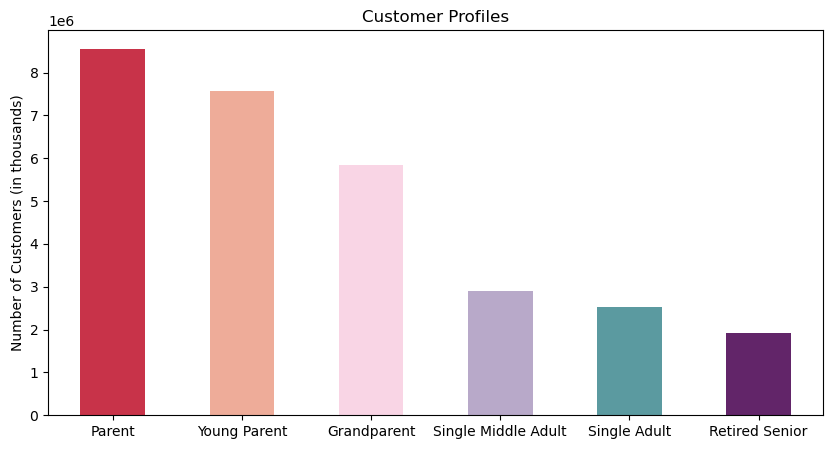

In [46]:
# Creating bar of profiles 

# Creating bar for frequency of department

bar_prof = cust['profile'].value_counts().plot.bar(rot= 0, figsize = (10,5), color =['#c83349', '#eeac99', '#f9d5e5', '#b8a9c9', '#5b9aa0', '#622569'])

# Adding title and axis name

plt.title('Customer Profiles')
plt.xlabel('')
plt.ylabel('Number of Customers (in thousands)')

In [47]:
# Exporting Customer profiles bar chart

bar_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'num_cust_prof.png'))

In [48]:
# crosstab of profile and income 

cross_prof_in = pd.crosstab(cust['profile'], cust['class'], dropna = False)

In [49]:
# Checking output of crosstab between profile and class

cross_prof_in

class,High,Low,Middle
profile,,,
Grandparent,15288,547068,5278634
Parent,22727,809539,7726824
Retired Senior,4313,163762,1745495
Single Adult,1004,477554,2038148
Single Middle Adult,8382,274997,2611232
Young Parent,3652,1411902,6162760


Text(0, 0.5, 'Number of Customers (in millions)')

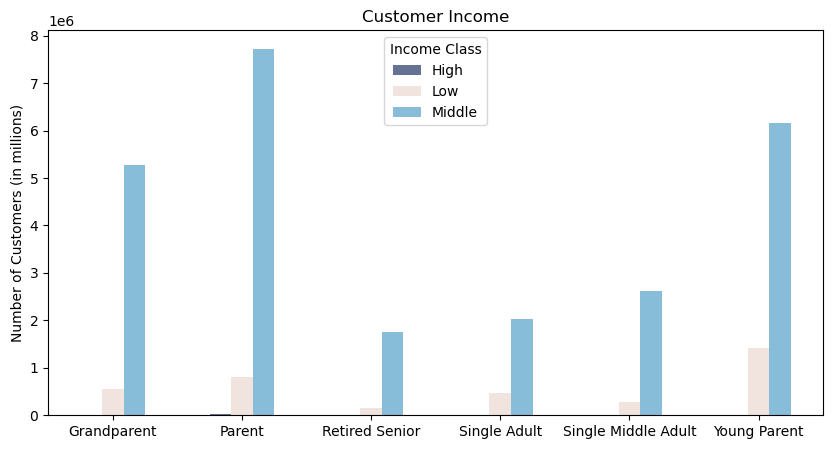

In [50]:
# Visualization of crosstab_profile_in

bar_in_prof = cross_prof_in.plot(kind = 'bar', rot = 0, figsize = (10,5), color = ['#667292', '#f1e3dd', '#87bdd8'])
bar_in_prof.legend(title = 'Income Class', loc = 'upper center', labels =['High', 'Low', 'Middle'])
        
# Creating title and adding axis names

plt.title('Customer Income')
plt.xlabel('')
plt.ylabel('Number of Customers (in millions)')

In [51]:
# Exporting income profile bar chart

bar_in_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_prof.png'))

### e. Department to Customer Profile

In [52]:
# Importing department dataframe 

dept = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'), index_col = 0)

In [53]:
# Checking output for dept

dept

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [54]:
# Creating data dictionary 

data_dict = dept.to_dict('index')

In [55]:
# Checking output for data_dict

data_dict

{1: {'department': 'frozen'},
 2: {'department': 'other'},
 3: {'department': 'bakery'},
 4: {'department': 'produce'},
 5: {'department': 'alcohol'},
 6: {'department': 'international'},
 7: {'department': 'beverages'},
 8: {'department': 'pets'},
 9: {'department': 'dry goods pasta'},
 10: {'department': 'bulk'},
 11: {'department': 'personal care'},
 12: {'department': 'meat seafood'},
 13: {'department': 'pantry'},
 14: {'department': 'breakfast'},
 15: {'department': 'canned goods'},
 16: {'department': 'dairy eggs'},
 17: {'department': 'household'},
 18: {'department': 'babies'},
 19: {'department': 'snacks'},
 20: {'department': 'deli'},
 21: {'department': 'missing'}}

In [56]:
# Checking total orders by department_id

cust['department_id'].value_counts()

4     8608701
16    4909353
19    2620533
7     2437586
1     1996444
13    1681391
3     1060612
15     954449
20     947553
9      773993
17     658975
12     637276
14     633469
11     399739
18     391707
6      240869
5      134867
8       87805
21      63389
2       32572
10      31998
Name: department_id, dtype: int64

Department id and Department name 

4     produce
16    dairy eggs
19    snacks
7     beverages
1     frozen
13    pantry
3     bakery
15    canned goods
20    deli
9     dry goods pasta
17    household
12    meat seafood
14    breakfast
11    personal care
18    babies
6     international
5     alcohol
8     pets
21    missing
2     other
10    bulk

([<matplotlib.axis.YTick at 0x7f767ad63d30>,
 [Text(0, 0, 'Produce'),
  Text(0, 1, 'Dairy Eggs'),
  Text(0, 2, 'Snacks'),
  Text(0, 3, 'Beverages'),
  Text(0, 4, 'Frozen'),
  Text(0, 5, 'Pantry'),
  Text(0, 6, 'Bakery'),
  Text(0, 7, 'Canned Goods'),
  Text(0, 8, 'Deli'),
  Text(0, 9, 'Dry Goods Pasta'),
  Text(0, 10, 'Household'),
  Text(0, 11, 'Meat Seafood'),
  Text(0, 12, 'Breakfast'),
  Text(0, 13, 'Personal Care'),
  Text(0, 14, 'Babies'),
  Text(0, 15, 'International'),
  Text(0, 16, 'Alcohol'),
  Text(0, 17, 'Pets'),
  Text(0, 18, 'Missing'),
  Text(0, 19, 'Other'),
  Text(0, 20, 'Bulk')])

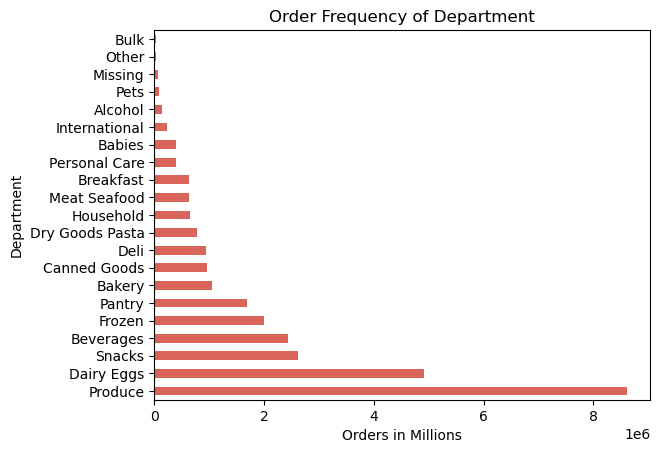

In [57]:
# Creating bar for frequency of department

bar_dept = cust['department_id'].value_counts().plot.barh(color ='#d96459')

# Adding title and axis name

plt.title('Order Frequency of Department')
plt.ylabel('Department')
plt.xlabel('Orders in Millions')
plt.yticks(np.arange(21),['Produce', 'Dairy Eggs', 'Snacks', 'Beverages', 'Frozen', 'Pantry','Bakery', 'Canned Goods', 'Deli', 'Dry Goods Pasta', 'Household', 'Meat Seafood', 'Breakfast', 'Personal Care', 'Babies', 'International', 'Alcohol', 'Pets', 'Missing', 'Other', 'Bulk'])

Top 5 departments are produce, dairy eggs, snacks, beverages, frozen

Least purchased products are alcohol, pets, missing, other, bulk

In [58]:
# Exporting chart 

bar_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_freq.png'))

In [59]:
# Creating crosstab for profile and department

cross_prof_dept = pd.crosstab(cust['profile'], cust['department_id'], dropna = False)

In [60]:
# Results of crosstab

cross_prof_dept

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
profile,,,,,,,,,,,,,,,,,,,,,
Grandparent,398245,6423,211400,1718691,25619,47609,488499,17425,154422,6557,...,129256,336161,125222,191170,975543,133244,76710,519524,188558,12644
Parent,583788,9393,309388,2506157,38303,70242,718916,25705,226396,9396,...,186751,492711,185651,278903,1428046,195127,116126,764385,275233,18744
Retired Senior,132935,2041,68417,564500,8564,15576,159810,6430,50158,2007,...,41885,109237,40051,60964,321190,42495,24581,170609,61776,3905
Single Adult,167219,2952,91681,741566,11724,21156,210494,7611,66097,2663,...,53036,143586,53742,82496,422942,56196,34652,224673,81958,5648
Single Middle Adult,197790,3261,106077,851723,14195,23939,241640,8213,76118,2965,...,61603,165830,63359,93420,483243,62755,39255,258551,95632,6048
Young Parent,516467,8502,273649,2226064,36462,62347,618227,22421,200802,8410,...,164745,433866,165444,247496,1278389,169158,100383,682791,244396,16400


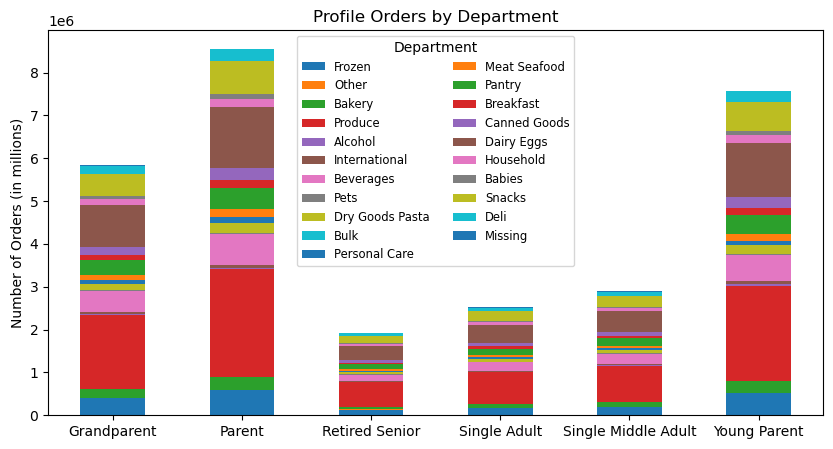

In [61]:
# Creating stacked bar chart for profile and department_id

bar_prof_dept = cross_prof_dept.loc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].plot.bar(stacked = True, rot = 0, figsize = (10,5))


# Adding title and axis names 

plt.title('Profile Orders by Department')
plt.xlabel('')
plt.ylabel('Number of Orders (in millions)')

# Creating legend

bar_prof_dept.legend(title = 'Department', loc = 'upper center', fontsize = 'small', ncol = 2, labels = ['Frozen', 'Other', 'Bakery', 'Produce', 'Alcohol', 'International', 'Beverages', 'Pets', 'Dry Goods Pasta', 'Bulk', 'Personal Care', 'Meat Seafood', 'Pantry', 'Breakfast', 'Canned Goods', 'Dairy Eggs', 'Household', 'Babies', 'Snacks', 'Deli', 'Missing'])

In [62]:
# Exporting profile orders 

bar_prof_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_ords.png'))

In [63]:
# Creating subgroup for Grandparent 

grand = cust[cust['profile'] == 'Grandparent']

([<matplotlib.axis.YTick at 0x7f7667c316d0>,
 [Text(0, 0, 'Produce'),
  Text(0, 1, 'Dairy Eggs'),
  Text(0, 2, 'Snacks'),
  Text(0, 3, 'Beverages'),
  Text(0, 4, 'Frozen'),
  Text(0, 5, 'Pantry'),
  Text(0, 6, 'Bakery'),
  Text(0, 7, 'Canned Goods'),
  Text(0, 8, 'Deli'),
  Text(0, 9, 'Dry Goods Pasta'),
  Text(0, 10, 'Household'),
  Text(0, 11, 'Meat Seafood'),
  Text(0, 12, 'Breakfast'),
  Text(0, 13, 'Personal Care'),
  Text(0, 14, 'Babies'),
  Text(0, 15, 'International'),
  Text(0, 16, 'Alcohol'),
  Text(0, 17, 'Pets'),
  Text(0, 18, 'Missing'),
  Text(0, 19, 'Bulk'),
  Text(0, 20, 'Other')])

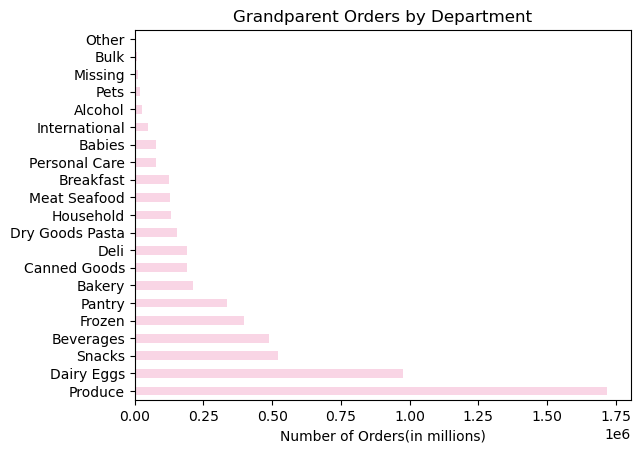

In [64]:
# Creating bar chart of Grandparent purchases by departments 

grand_bar = grand['department_id'].value_counts().plot.barh(color = ['#f9d5e5'])

# Adding title and axis name 

plt.title('Grandparent Orders by Department')
plt.xlabel ('Number of Orders(in millions)')
plt.ylabel('')
plt.yticks(np.arange(21),['Produce', 'Dairy Eggs', 'Snacks', 'Beverages', 'Frozen', 'Pantry','Bakery', 'Canned Goods', 'Deli', 'Dry Goods Pasta', 'Household', 'Meat Seafood', 'Breakfast', 'Personal Care', 'Babies', 'International', 'Alcohol', 'Pets', 'Missing', 'Bulk', 'Other'])

In [65]:
# Exporting Grandparent Orders by Department 

grand_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'grandparent_dept.png'))

In [66]:
# Creating subgroup for Parent

parent = cust[cust['profile'] == 'Parent']

([<matplotlib.axis.YTick at 0x7f7667961d00>,
 [Text(0, 0, 'Produce'),
  Text(0, 1, 'Dairy Eggs'),
  Text(0, 2, 'Snacks'),
  Text(0, 3, 'Beverages'),
  Text(0, 4, 'Frozen'),
  Text(0, 5, 'Pantry'),
  Text(0, 6, 'Bakery'),
  Text(0, 7, 'Canned Goods'),
  Text(0, 8, 'Deli'),
  Text(0, 9, 'Dry Goods Pasta'),
  Text(0, 10, 'Household'),
  Text(0, 11, 'Meat Seafood'),
  Text(0, 12, 'Breakfast'),
  Text(0, 13, 'Personal Care'),
  Text(0, 14, 'Babies'),
  Text(0, 15, 'International'),
  Text(0, 16, 'Alcohol'),
  Text(0, 17, 'Pets'),
  Text(0, 18, 'Missing'),
  Text(0, 19, 'Bulk'),
  Text(0, 20, 'Other')])

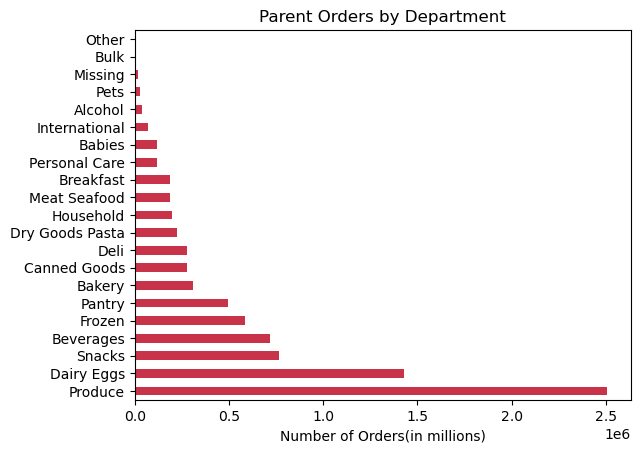

In [67]:
# Creating bar chart of Parent purchases by Department

parent_bar = parent['department_id'].value_counts().plot.barh(color = ['#c83349'])

# Adding title and axis name 

plt.title('Parent Orders by Department')
plt.xlabel ('Number of Orders(in millions)')
plt.ylabel('')
plt.yticks(np.arange(21),['Produce', 'Dairy Eggs', 'Snacks', 'Beverages', 'Frozen', 'Pantry','Bakery', 'Canned Goods', 'Deli', 'Dry Goods Pasta', 'Household', 'Meat Seafood', 'Breakfast', 'Personal Care', 'Babies', 'International', 'Alcohol', 'Pets', 'Missing', 'Bulk', 'Other'])

In [68]:
# Exporting Parent Orders by Department 

parent_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_dept.png' ))

In [69]:
# Creating subgroup for Young Parent

y_parent = cust[cust['profile'] == 'Young Parent']

([<matplotlib.axis.YTick at 0x7f7642ee9c40>,
 [Text(0, 0, 'Produce'),
  Text(0, 1, 'Dairy Eggs'),
  Text(0, 2, 'Snacks'),
  Text(0, 3, 'Beverages'),
  Text(0, 4, 'Frozen'),
  Text(0, 5, 'Pantry'),
  Text(0, 6, 'Bakery'),
  Text(0, 7, 'Canned Goods'),
  Text(0, 8, 'Deli'),
  Text(0, 9, 'Dry Goods Pasta'),
  Text(0, 10, 'Household'),
  Text(0, 11, 'Breakfast'),
  Text(0, 12, 'Meat Seafood'),
  Text(0, 13, 'Personal Care'),
  Text(0, 14, 'Babies'),
  Text(0, 15, 'International'),
  Text(0, 16, 'Alcohol'),
  Text(0, 17, 'Pets'),
  Text(0, 18, 'Missing'),
  Text(0, 19, 'Other'),
  Text(0, 20, 'Bulk')])

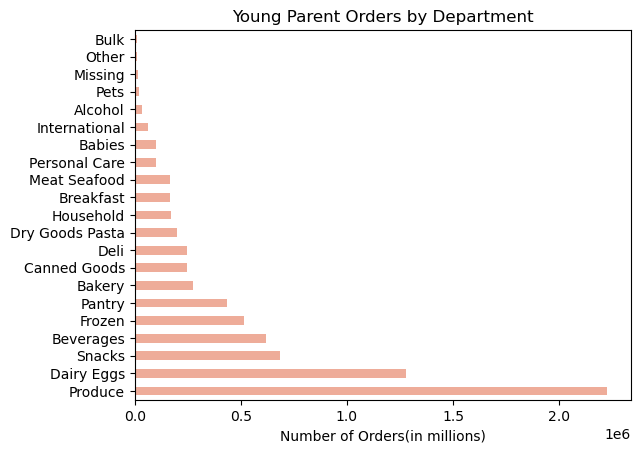

In [70]:
# Creating bar chart of Young Parent purchases by departments 

y_parent_bar = y_parent['department_id'].value_counts().plot.barh(color = ['#eeac99'])

# Adding title and axis name 

plt.title('Young Parent Orders by Department')
plt.xlabel ('Number of Orders(in millions)')
plt.ylabel('')
plt.yticks(np.arange(21),['Produce', 'Dairy Eggs', 'Snacks', 'Beverages', 'Frozen', 'Pantry','Bakery', 'Canned Goods', 'Deli', 'Dry Goods Pasta', 'Household', 'Breakfast','Meat Seafood', 'Personal Care', 'Babies', 'International', 'Alcohol', 'Pets', 'Missing', 'Other', 'Bulk'])

In [71]:
# Exporting Young Parent Orders by Department 

y_parent_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'young_parent_dept.png'))

In [72]:
# Creating subgroup for Retired Senior 

r_senior = cust[cust['profile'] == 'Retired Senior']

([<matplotlib.axis.YTick at 0x7f7528ef0a90>,
 [Text(0, 0, 'Produce'),
  Text(0, 1, 'Dairy Eggs'),
  Text(0, 2, 'Snacks'),
  Text(0, 3, 'Beverages'),
  Text(0, 4, 'Frozen'),
  Text(0, 5, 'Pantry'),
  Text(0, 6, 'Bakery'),
  Text(0, 7, 'Deli'),
  Text(0, 8, 'Canned Goods'),
  Text(0, 9, 'Dry Goods Pasta'),
  Text(0, 10, 'Household'),
  Text(0, 11, 'Meat Seafood'),
  Text(0, 12, 'Breakfast'),
  Text(0, 13, 'Personal Care'),
  Text(0, 14, 'Babies'),
  Text(0, 15, 'International'),
  Text(0, 16, 'Alcohol'),
  Text(0, 17, 'Pets'),
  Text(0, 18, 'Missing'),
  Text(0, 19, 'Other'),
  Text(0, 20, 'Bulk')])

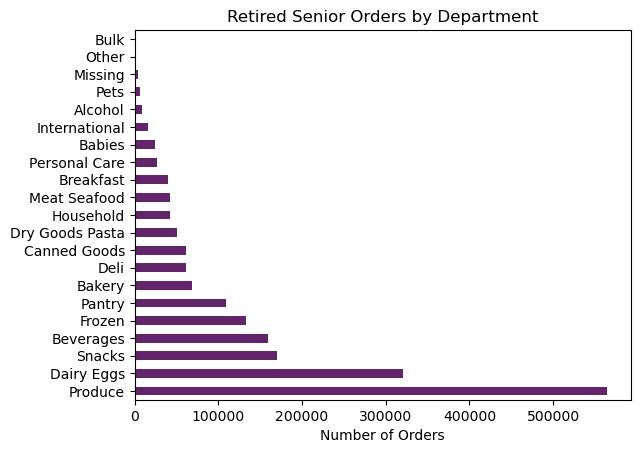

In [73]:
# Creating bar chart for Retired Senior purchases by Department

r_senior_bar = r_senior['department_id'].value_counts().plot.barh(color = ['#622569'])

# Adding title and axis name 

plt.title('Retired Senior Orders by Department')
plt.xlabel ('Number of Orders')
plt.ylabel('')
plt.yticks(np.arange(21),['Produce', 'Dairy Eggs', 'Snacks', 'Beverages', 'Frozen', 'Pantry','Bakery', 'Deli', 'Canned Goods', 'Dry Goods Pasta', 'Household', 'Meat Seafood', 'Breakfast','Personal Care', 'Babies', 'International', 'Alcohol', 'Pets', 'Missing', 'Other', 'Bulk'])

In [74]:
# Exporing Retired Senior Orders by Department 

r_senior_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'retired_senior_dept.png'))

In [75]:
# Creating subgroup for Single Adult

sin_adult = cust[cust['profile'] == 'Single Adult']

([<matplotlib.axis.YTick at 0x7f7528f1fee0>,
 [Text(0, 0, 'Produce'),
  Text(0, 1, 'Dairy Eggs'),
  Text(0, 2, 'Snacks'),
  Text(0, 3, 'Beverages'),
  Text(0, 4, 'Frozen'),
  Text(0, 5, 'Pantry'),
  Text(0, 6, 'Bakery'),
  Text(0, 7, 'Canned Goods'),
  Text(0, 8, 'Deli'),
  Text(0, 9, 'Dry Goods Pasta'),
  Text(0, 10, 'Household'),
  Text(0, 11, 'Breakfast'),
  Text(0, 12, 'Meat Seafood'),
  Text(0, 13, 'Babies'),
  Text(0, 14, 'Personal Care'),
  Text(0, 15, 'International'),
  Text(0, 16, 'Alcohol'),
  Text(0, 17, 'Pets'),
  Text(0, 18, 'Missing'),
  Text(0, 19, 'Other'),
  Text(0, 20, 'Bulk')])

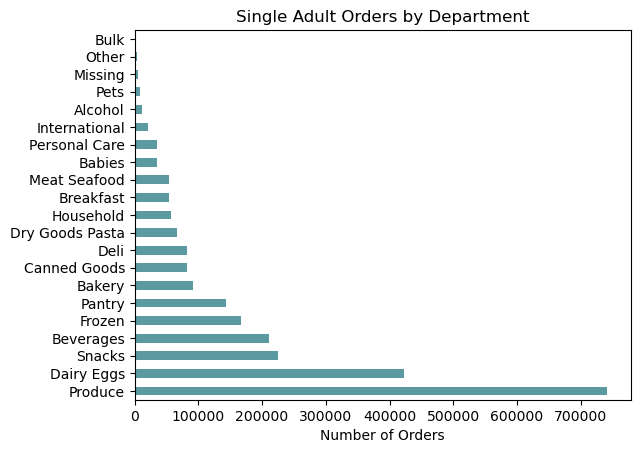

In [76]:
# Creating bar for Single Adult purchases by Department 

sin_adult_bar = sin_adult['department_id'].value_counts().plot.barh(color = ['#5b9aa0'])

# Adding title and axis name 

plt.title('Single Adult Orders by Department')
plt.xlabel ('Number of Orders')
plt.ylabel('')
plt.yticks(np.arange(21),['Produce', 'Dairy Eggs', 'Snacks', 'Beverages', 'Frozen', 'Pantry','Bakery', 'Canned Goods', 'Deli', 'Dry Goods Pasta', 'Household', 'Breakfast','Meat Seafood', 'Babies', 'Personal Care','International', 'Alcohol', 'Pets', 'Missing', 'Other', 'Bulk'])

In [77]:
# Exporting Single Adult Orders by Department 

sin_adult_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'single_adult_dept.png'))

In [78]:
# Creating subgroup for Single Middle Adult 

sin_mid_adult = cust[cust['profile'] == 'Single Middle Adult']

([<matplotlib.axis.YTick at 0x7f7667c261c0>,
 [Text(0, 0, 'Produce'),
  Text(0, 1, 'Dairy Eggs'),
  Text(0, 2, 'Snacks'),
  Text(0, 3, 'Beverages'),
  Text(0, 4, 'Frozen'),
  Text(0, 5, 'Pantry'),
  Text(0, 6, 'Bakery'),
  Text(0, 7, 'Deli'),
  Text(0, 8, 'Canned Goods'),
  Text(0, 9, 'Dry Goods Pasta'),
  Text(0, 10, 'Breakfast'),
  Text(0, 11, 'Household'),
  Text(0, 12, 'Meat Seafood'),
  Text(0, 13, 'Babies'),
  Text(0, 14, 'Personal Care'),
  Text(0, 15, 'International'),
  Text(0, 16, 'Alcohol'),
  Text(0, 17, 'Pets'),
  Text(0, 18, 'Missing'),
  Text(0, 19, 'Other'),
  Text(0, 20, 'Bulk')])

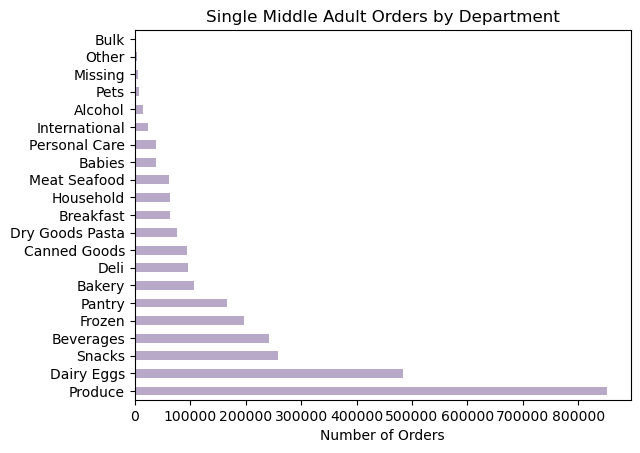

In [79]:
# Creating bar chart for Single Middle Adult purchases by department

sin_mid_adult_bar = sin_mid_adult['department_id'].value_counts().plot.barh(color = ['#b8a9c9'])

# Adding title and axis name 

plt.title('Single Middle Adult Orders by Department')
plt.xlabel ('Number of Orders')
plt.ylabel('')
plt.yticks(np.arange(21),['Produce', 'Dairy Eggs', 'Snacks', 'Beverages', 'Frozen', 'Pantry','Bakery', 'Deli','Canned Goods', 'Dry Goods Pasta', 'Breakfast','Household','Meat Seafood', 'Babies', 'Personal Care','International', 'Alcohol', 'Pets', 'Missing', 'Other', 'Bulk'])

In [80]:
# Exporting Single Middle Adult Orders by Department 

sin_mid_adult_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'single_mid_adult_dept.png'))

In [81]:
# crosstab for age_group and orders

cross_age_dept = pd.crosstab(cust['age_group'], cust['department_id'], dropna = False)

In [82]:
# Results of crosstab

cross_age_dept

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
age_group,,,,,,,,,,,,,,,,,,,,,
Middle age,781578,12654,415465,3357880,52498,94181,960556,33918,302514,12361,...,248354,658541,249010,372323,1911289,257882,155381,1022936,370865,24792
Senior,531180,8464,279817,2283191,34183,63185,648309,23855,204580,8564,...,171141,445398,165273,252134,1296733,175739,101291,690133,250334,16549
Young adult,683686,11454,365330,2967630,48186,83503,828721,30032,266899,11073,...,217781,577452,219186,329992,1701331,225354,135035,907464,326354,22048


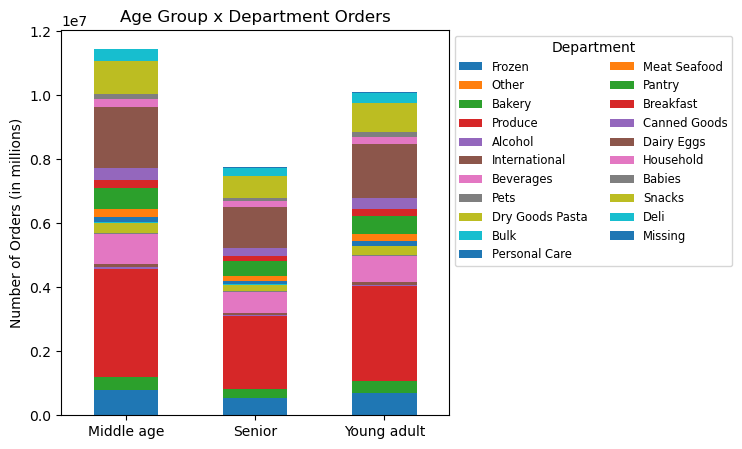

In [83]:
# Bar chart for age and orders

bar_age_dept = cross_age_dept.loc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].plot.bar(stacked = True, rot = 0, figsize = (5,5))


# Adding title and axis names 

plt.title('Age Group x Department Orders')
plt.xlabel('')
plt.ylabel('Number of Orders (in millions)')

# Creating legend

bar_age_dept.legend(title = 'Department', loc = 'best', bbox_to_anchor = (1.0,1.0), fontsize = 'small', ncol = 2, labels = ['Frozen', 'Other', 'Bakery', 'Produce', 'Alcohol', 'International', 'Beverages', 'Pets', 'Dry Goods Pasta', 'Bulk', 'Personal Care', 'Meat Seafood', 'Pantry', 'Breakfast', 'Canned Goods', 'Dairy Eggs', 'Household', 'Babies', 'Snacks', 'Deli', 'Missing'])

In [84]:
# Exporting bar_age_dept

bar_age_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_ords.png'))

In [85]:
# crosstab for class and dept

cross_in_dept = pd.crosstab(cust['class'], cust['department_id'], dropna = False)

In [86]:
# Results of cross_in_dept

cross_in_dept

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
class,,,,,,,,,,,,,,,,,,,,,
High,3899,96,2457,11213,1784,478,5311,458,1670,4,...,1327,3438,1265,2066,9341,2710,427,5046,1498,55
Low,235577,4158,118680,924539,18412,24275,409438,9578,73219,5057,...,40975,183460,98237,89278,557718,93042,34763,588228,116865,7538
Middle,1756968,28318,939475,7672949,114671,216116,2022837,77769,699104,26937,...,594974,1494493,533967,863105,4342294,563223,356517,2027259,829190,55796


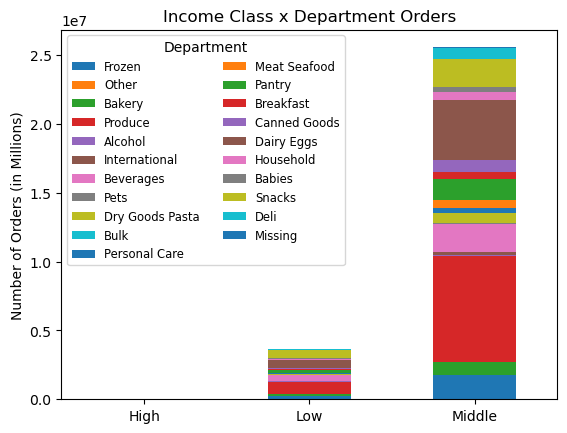

In [87]:
bar_in_dept = cross_in_dept.loc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].plot.bar(stacked = True, rot = 0)


# Adding title and axis names 

plt.title('Income Class x Department Orders')
plt.xlabel('')
plt.ylabel('Number of Orders (in Millions)')

# Creating legend

bar_in_dept.legend(title = 'Department', loc = 'upper left', fontsize = 'small', ncol = 2, labels = ['Frozen', 'Other', 'Bakery', 'Produce', 'Alcohol', 'International', 'Beverages', 'Pets', 'Dry Goods Pasta', 'Bulk', 'Personal Care', 'Meat Seafood', 'Pantry', 'Breakfast', 'Canned Goods', 'Dairy Eggs', 'Household', 'Babies', 'Snacks', 'Deli', 'Missing'])

In [88]:
# Exporting bar_in_dept

bar_in_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'class_dept_orders.png'))

### f. Loyalty customers

In [89]:
# Crosstab for loyalty customers and days_since_prior_order

loyal_orders = pd.crosstab(cust['days_since_prior_order'], cust['loyalty_flag'], dropna = False)

In [90]:
# Results of loyal_orders

loyal_orders

loyalty_flag,Loyal customer,New customer,Regular customer
days_since_prior_order,,,
0.0,239649,40517,157845
1.0,626159,43354,262177
2.0,973214,60662,417492
3.0,1185968,86136,587710
4.0,1202971,107496,747056
5.0,1074717,136069,886697
6.0,1090986,191359,1196418
7.0,1351314,291064,1775061
8.0,643383,185317,1065114


Text(0, 0.5, 'Number of orders (in millions)')

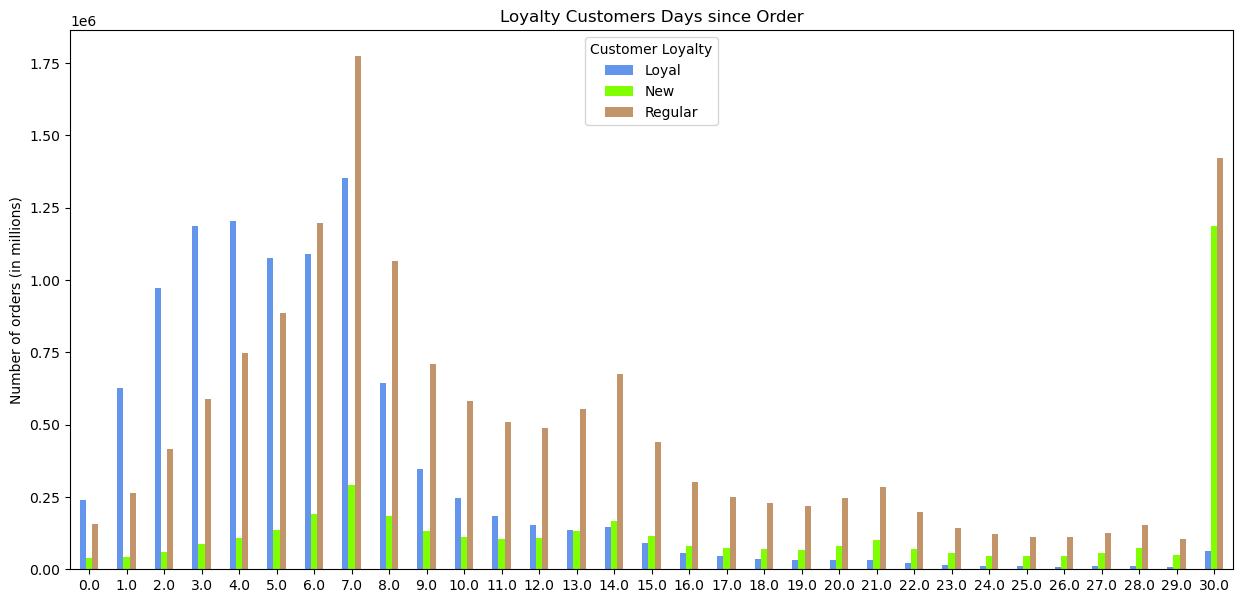

In [91]:
# Creating chart for frequency of loyal_orders

loyal_ords_day = loyal_orders.plot(kind ='bar', rot = 0, color = ['#6495ed', '#7fff00', '#c1946a'], figsize = (15, 7))
loyal_ords_day.legend(title = 'Customer Loyalty', loc = 'upper center', labels = ['Loyal', 'New', 'Regular'])


# Adding title and axis names 

plt.title('Loyalty Customers Days since Order')
plt.xlabel('')
plt.ylabel('Number of orders (in millions)')

In [92]:
# Exporting Loyalty Customers Days since Order

loyal_ords_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_days_ords.png'))

In [93]:
# crosstab for loyalty customers and dept

cross_loyal_dept = pd.crosstab(cust['department_id'], cust['loyalty_flag'], dropna = False)

In [94]:
# checking results of cross_loyal_dept

cross_loyal_dept

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,597620,318930,1079894
2,10536,4995,17041
3,372925,147535,540152
4,3089439,1150657,4368605
5,38081,23854,72932
6,76785,37422,126662
7,840147,341838,1255601
8,25011,13526,49268
9,237845,124038,412110


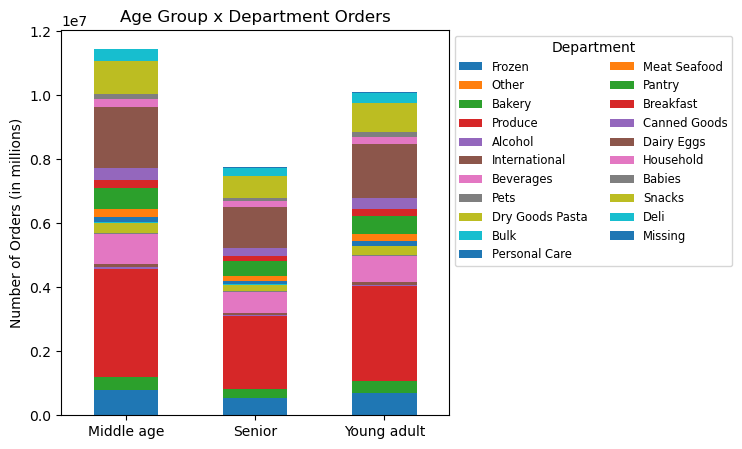

In [96]:
# Bar chart for age and orders

bar_age_dept = cross_age_dept.loc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].plot.bar(stacked = True, rot = 0, figsize = (5,5))


# Adding title and axis names 

plt.title('Age Group x Department Orders')
plt.xlabel('')
plt.ylabel('Number of Orders (in millions)')

# Creating legend

bar_age_dept.legend(title = 'Department', loc = 'best', bbox_to_anchor = (1.0,1.0), fontsize = 'small', ncol = 2, labels = ['Frozen', 'Other', 'Bakery', 'Produce', 'Alcohol', 'International', 'Beverages', 'Pets', 'Dry Goods Pasta', 'Bulk', 'Personal Care', 'Meat Seafood', 'Pantry', 'Breakfast', 'Canned Goods', 'Dairy Eggs', 'Household', 'Babies', 'Snacks', 'Deli', 'Missing'])

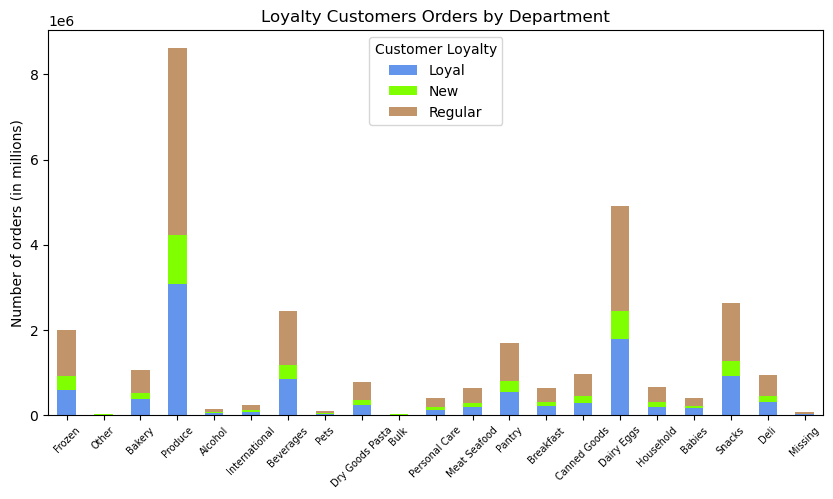

In [97]:
# Creating stacked bar chart for loyalty and department

bar_dept_loyal = cross_loyal_dept.plot.bar(stacked = True, rot = 45, figsize = (10,5),color = ['#6495ed', '#7fff00', '#c1946a'])

# Adding title and axis names 

plt.title('Loyalty Customers Orders by Department')
plt.xlabel('')
plt.ylabel('Number of orders (in millions)')
plt.xticks(np.arange(21), ['Frozen', 'Other', 'Bakery', 'Produce', 'Alcohol', 'International', 'Beverages', 'Pets', 'Dry Goods Pasta', 'Bulk', 'Personal Care', 'Meat Seafood', 'Pantry', 'Breakfast', 'Canned Goods', 'Dairy Eggs', 'Household', 'Babies', 'Snacks', 'Deli', 'Missing'])
plt.xticks(fontsize = 7)

# Creating legend 

bar_dept_loyal.legend(title = 'Customer Loyalty', loc = 'upper center', labels = ['Loyal', 'New', 'Regular'])

In [98]:
# Exporting loyalty orders

bar_dept_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_ords_loyal.png'))

### g. Profile and Orders day of week

In [99]:
# Creating crosstab for ords_day_of_week and profile

cross_dow_prof = pd.crosstab(cust['orders_day_of_week'], cust['profile'], dropna = False)

In [100]:
# Results of cross_dow_prof
cross_dow_prof

profile,Grandparent,Parent,Retired Senior,Single Adult,Single Middle Adult,Young Parent
orders_day_of_week,,,,,,
0,1112007,1615801,363423,474888,553586,1448594
1,1012731,1494974,329533,456517,505171,1326674
2,760303,1123972,248090,325019,376052,980628
3,696792,1015732,231205,297759,339864,897322
4,684456,1006619,223393,299256,337020,890947
5,762825,1107365,249877,324459,389421,996070
6,811876,1194627,268049,338808,393497,1038079


([<matplotlib.axis.XTick at 0x7f7594b71970>,
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Tuesday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Friday')])

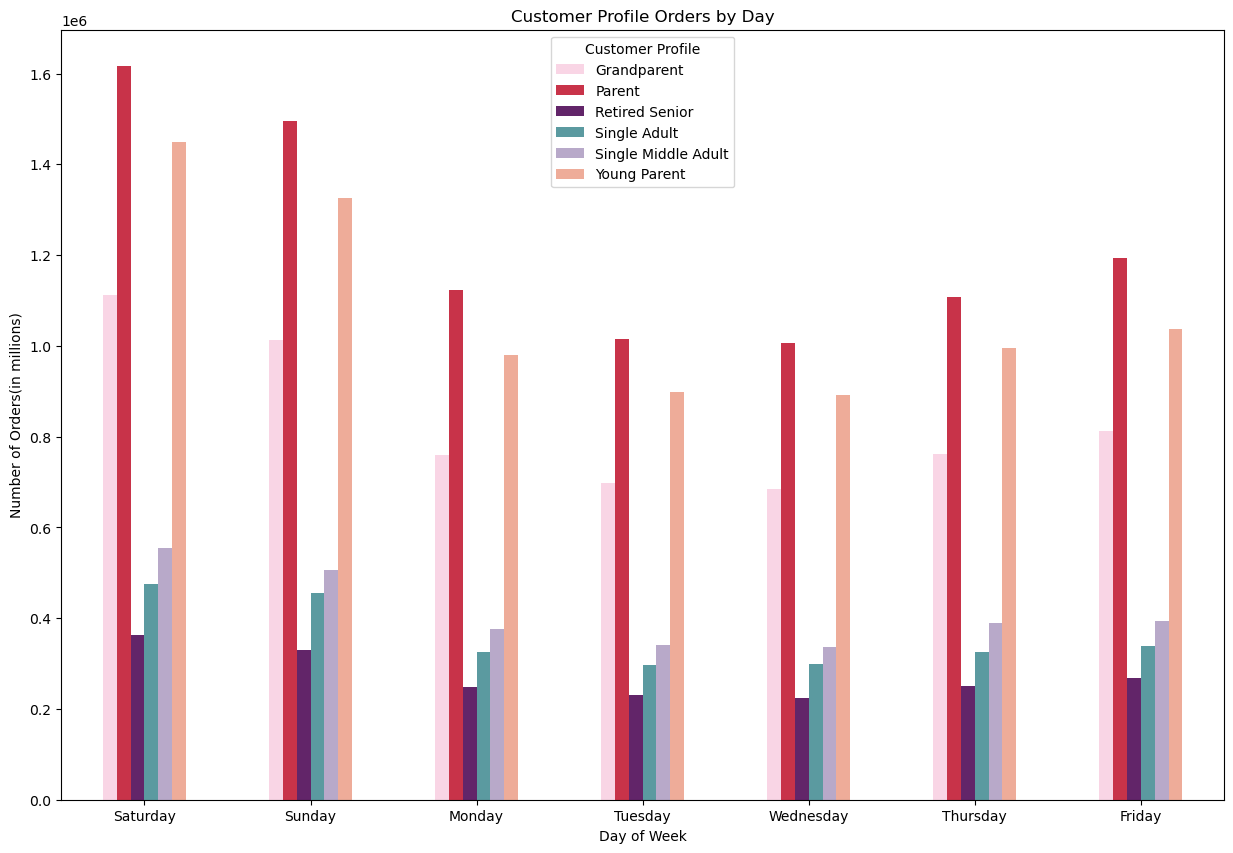

In [101]:
# Bar chart of orders day of week and  profile

bar_dow_prof = cross_dow_prof.plot.bar(rot = 0, figsize = (15,10), color =['#f9d5e5', '#c83349','#622569', '#5b9aa0', '#b8a9c9','#eeac99'])
bar_dow_prof.legend(title = 'Customer Profile', loc = 'upper center', labels = ['Grandparent', 'Parent', 'Retired Senior', 'Single Adult', 'Single Middle Adult', 'Young Parent'])

# Creating title and adding axis names

plt.title('Customer Profile Orders by Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders(in millions)')
plt.xticks(np.arange(7), ['Saturday', 'Sunday','Monday','Tuesday', 'Wednesday','Thursday','Friday'])

In [102]:
# Exporting bar_dow_prof

bar_dow_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dow_prof.png'))

In [103]:
# Creating crosstab for profile and orders_day_of_week

cross_prof_dow = pd.crosstab(cust['profile'], cust['orders_day_of_week'], dropna = False)

In [104]:
# Results of cross_prof_dow

cross_prof_dow

orders_day_of_week,0,1,2,3,4,5,6
profile,,,,,,,
Grandparent,1112007,1012731,760303,696792,684456,762825,811876
Parent,1615801,1494974,1123972,1015732,1006619,1107365,1194627
Retired Senior,363423,329533,248090,231205,223393,249877,268049
Single Adult,474888,456517,325019,297759,299256,324459,338808
Single Middle Adult,553586,505171,376052,339864,337020,389421,393497
Young Parent,1448594,1326674,980628,897322,890947,996070,1038079


Text(0, 0.5, 'Number of Orders (in millions)')

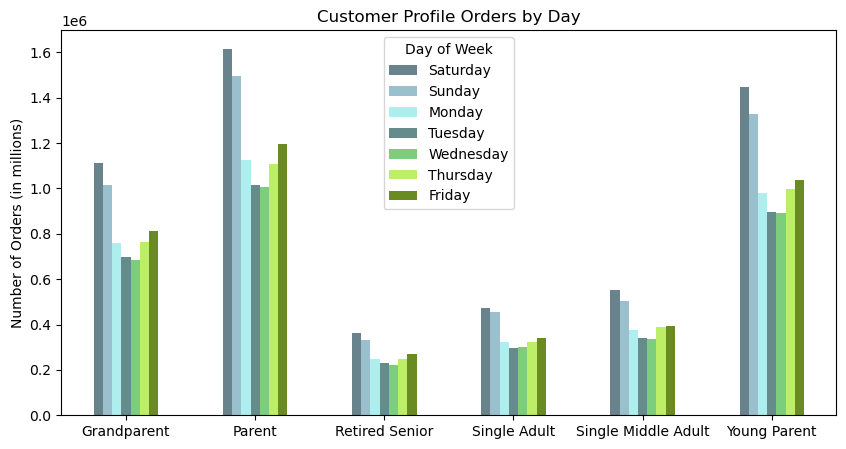

In [105]:
# Bar chart of profile and orders day of week

bar_prof_dow = cross_prof_dow.plot(kind = 'bar', rot = 0, figsize = (10,5), color= ['#68838B', '#9AC0CD', '#AEEEEE', '#668B8B', '#7CCD7C','#BCEE68', '#698B22'])
bar_prof_dow.legend(title = 'Day of Week', loc = 'upper center', labels =['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

#Creating title and adding axis names 

plt.title('Customer Profile Orders by Day')
plt.xlabel('')
plt.ylabel('Number of Orders (in millions)')

In [106]:
# Exporting customer_dow

bar_prof_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prof_dow.png'))

### h. Profile hour of day 

In [107]:
# Creating crosstab for order_hour_of_day and profile

cross_hr_prof = pd.crosstab(cust['order_hour_of_day'], cust['profile'], dropna = False)

In [108]:
# Results of cross_hr_prof

cross_hr_prof

profile,Grandparent,Parent,Retired Senior,Single Adult,Single Middle Adult,Young Parent
order_hour_of_day,,,,,,
0,38494,56887,11737,17181,19488,52104
1,20948,29569,6136,8781,10237,27789
2,11938,17201,4293,5070,5951,16883
3,9111,12981,3379,3898,4439,12176
4,9919,13624,2656,4173,4638,12456
5,16420,22678,5728,6673,7880,20803
6,53604,76617,17861,23987,25835,70220
7,166020,238025,56499,72708,81369,209640
8,318435,461877,101945,135691,158117,404597


Text(0, 0.5, 'Number of Orders (in millions)')

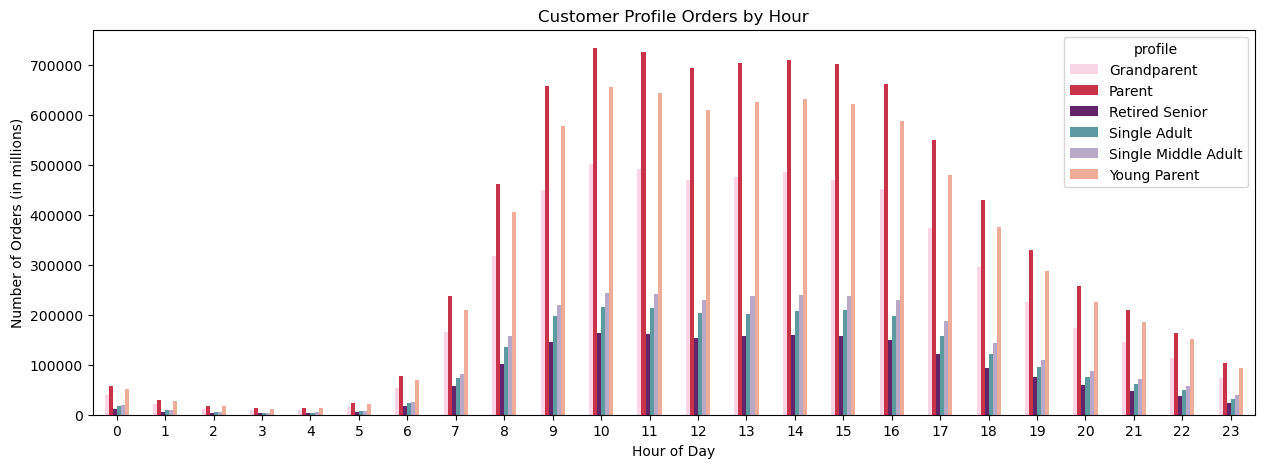

In [109]:
# Bar chart of profile and orders hour of day

bar_hr_prof = cross_hr_prof.plot.bar(rot = 0, color =['#f9d5e5', '#c83349','#622569', '#5b9aa0', '#b8a9c9','#eeac99'], figsize = (15,5), legend = ['Grandparent', 'Parent', 'Retired Senior', 'Single Adult', 'Single Middle Adult', 'Yount Parent'])

#Creating title and adding axis names 

plt.title('Customer Profile Orders by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders (in millions)')

In [110]:
# Exporting hours by profile

bar_hr_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ords_hr_prof.png'))

### i. Customer's by Regions

In [111]:
# crosstab of customer loyalty and region 

cross_loyal_reg = pd.crosstab(cust['loyalty_flag'], cust['region'], dropna = False)

In [112]:
# Results of cross_loyal_reg

cross_loyal_reg

region,Midwest,Northeast,South,West
loyalty_flag,,,,
Loyal customer,2329930,1807933,3342987,2614531
New customer,976004,723027,1369008,1058170
Regular customer,3562485,2641901,5044878,3832427


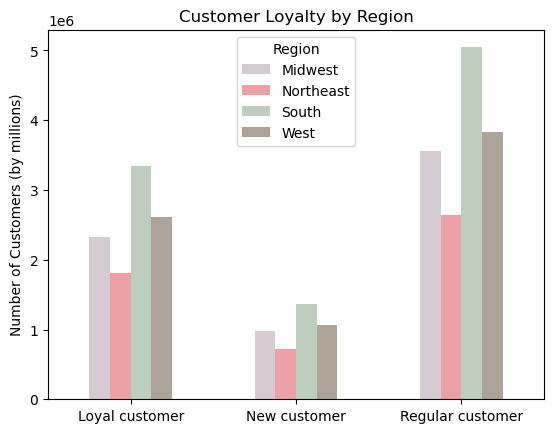

In [113]:
# Bar chart of loyalty and region 

bar_loyal_reg = cross_loyal_reg.plot(kind = 'bar', rot = 0, color= ['#d6cbd3','#eca1a6','#bdcebe','#ada397'])

# Creating title and adding axis names 

plt.title('Customer Loyalty by Region')
plt.xlabel('')
plt.ylabel('Number of Customers (by millions)')

# Creating legend

bar_loyal_reg.legend(title = 'Region', loc = 'upper center', labels = ['Midwest', 'Northeast', 'South', 'West'])

In [114]:
# Exporting loyalty region 

bar_loyal_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_reg.png'))

In [115]:
# crosstab for profile and region 

cross_prof_region = pd.crosstab(cust['profile'], cust['region'], dropna = False)

In [116]:
# Results of cross_prof_region

cross_prof_region

region,Midwest,Northeast,South,West
profile,,,,
Grandparent,1354995,1047107,1940740,1498148
Parent,2021917,1517147,2813351,2206675
Retired Senior,444691,359305,621519,488055
Single Adult,582784,444205,856564,633153
Single Middle Adult,697744,477235,964869,754763
Young Parent,1766288,1327862,2559830,1924334


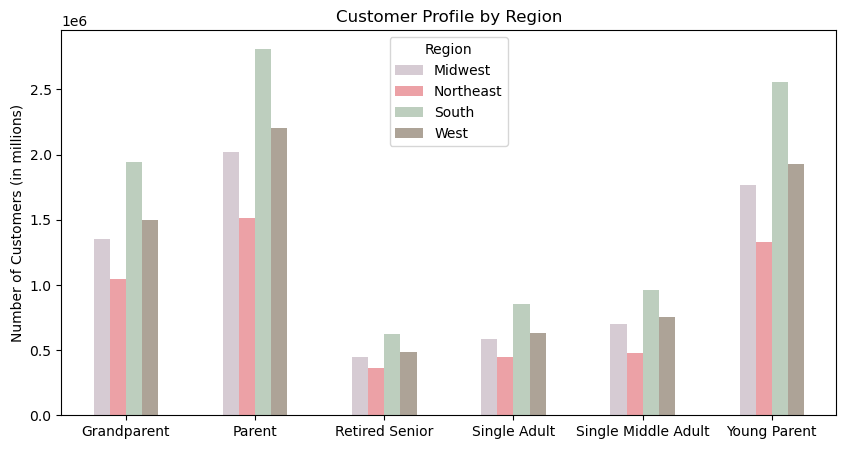

In [117]:
# Bar chart of profile and orders day of week

bar_prof_reg = cross_prof_region.plot.bar(rot = 0, figsize = (10,5), color= ['#d6cbd3','#eca1a6','#bdcebe','#ada397'])

#Creating title and adding axis names 

plt.title('Customer Profile by Region')
plt.xlabel('')
plt.ylabel('Number of Customers (in millions)')

# Creating legend

bar_prof_reg.legend(title = 'Region', loc = 'upper center')

In [118]:
# Exporting profile by region 

bar_prof_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prof_region.png'))

Text(0, 0.5, '')

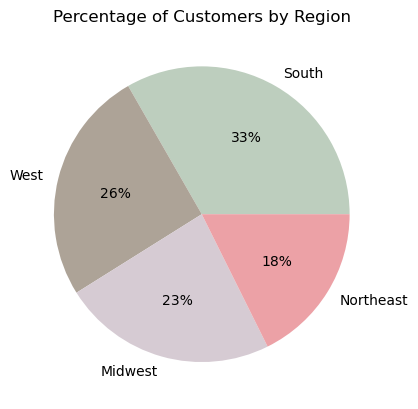

In [119]:
# Creating pie chart of customers and region 

cust_reg_pie = cust['region'].value_counts().plot.pie(colors = ['#bdcebe','#ada397','#d6cbd3','#eca1a6'], autopct = '%1.0f%%')

# Adding title

plt.title('Percentage of Customers by Region')
plt.ylabel('')

In [120]:
# Exporting Percentage of Customers by Region

cust_reg_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pct_cust_region.png'))

In [121]:
# crosstab department and region 

cross_dept_reg = pd.crosstab(cust['department_id'], cust['region'], dropna = False)

In [122]:
# Results for cross_dept_reg

cross_dept_reg

region,Midwest,Northeast,South,West
department_id,,,,
1,468610,348200,668262,511372
2,7529,5934,10984,8125
3,247398,188722,351632,272860
4,2022591,1510525,2870522,2205063
5,31765,23238,45585,34279
6,57057,41956,79669,62187
7,567075,439108,814364,617039
8,20161,16792,28160,22692
9,182168,135225,256831,199769


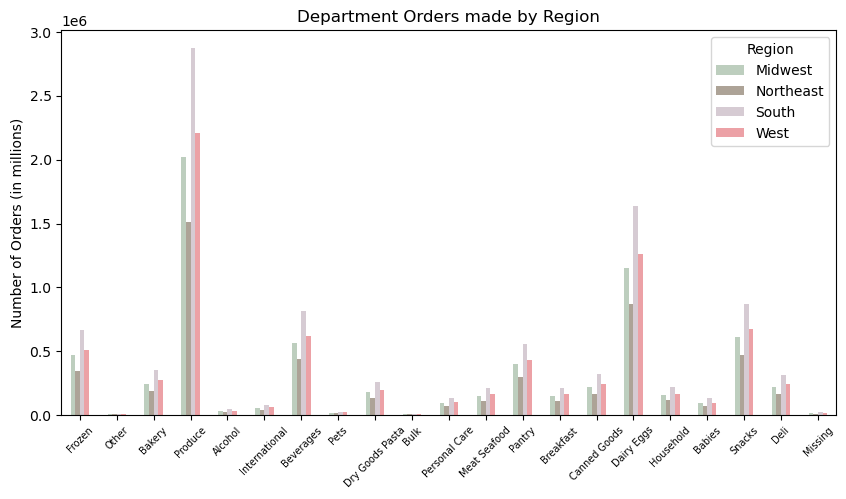

In [123]:
# Creating bar chart for department and region

bar_dept_reg = cross_dept_reg.plot.bar(rot = 45, color = ['#bdcebe','#ada397','#d6cbd3','#eca1a6'], figsize = (10,5))

# Adding title and axis names 

plt.title('Department Orders made by Region')
plt.xlabel('')
plt.ylabel('Number of Orders (in millions)')
plt.xticks(np.arange(21), ['Frozen', 'Other', 'Bakery', 'Produce', 'Alcohol', 'International', 'Beverages', 'Pets', 'Dry Goods Pasta', 'Bulk', 'Personal Care', 'Meat Seafood', 'Pantry', 'Breakfast', 'Canned Goods', 'Dairy Eggs', 'Household', 'Babies', 'Snacks', 'Deli', 'Missing'])
plt.xticks(fontsize = 7)

# Creating Legend

bar_dept_reg.legend(title = 'Region', labels = ['Midwest', 'Northeast', 'South', 'West'])

In [124]:
# Exporting bar_dept_reg

bar_dept_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_region_png'))

## 05. Aggregating Profiles

In [125]:
# Aggregating max, mean, and min of profile by prices

cust.groupby('profile').agg({'prices':['max', 'mean', 'min']})

prices               
                       max      mean  min
profile                                  
Grandparent           25.0  7.795309  1.0
Parent                25.0  7.791912  1.0
Retired Senior        25.0  7.804149  1.0
Single Adult          25.0  7.780663  1.0
Single Middle Adult   25.0  7.791016  1.0
Young Parent          25.0  7.787458  1.0

In [126]:
# Aggregating max, mean, and min of profile by max_order

cust.groupby('profile').agg({'max_order': ['max', 'mean', 'min']})

max_order               
                          max       mean min
profile                                     
Grandparent                99  35.136683   5
Parent                     99  35.029117   5
Retired Senior             99  35.287591   5
Single Adult               99  35.172089   5
Single Middle Adult        99  36.018724   5
Young Parent               99  35.405015   5

In [127]:
# Aggregating profile by add_to_cart_order

cust.groupby('profile').agg({'add_to_cart_order': ['max', 'mean', 'min']})

add_to_cart_order              
                                  max      mean min
profile                                            
Grandparent                        99  8.314478   1
Parent                            145  8.350016   1
Retired Senior                     88  8.275889   1
Single Adult                       86  8.350148   1
Single Middle Adult               137  8.363880   1
Young Parent                      109  8.438065   1

In [128]:
# Aggregating department_id to prices

cust.groupby('department_id').agg({'prices': ['max', 'mean', 'min']})

prices                
                 max       mean  min
department_id                       
1               15.0   7.733785  1.0
2               15.0   6.954694  1.1
3               15.0   7.859347  1.0
4               15.0   7.980882  1.0
5               15.0   8.154012  1.0
6               15.0   7.677667  1.0
7               15.0   7.686191  1.0
8               15.0   7.885155  1.0
9               15.0   7.345952  1.0
10              14.1   8.345778  1.4
11              15.0   8.003407  1.0
12              25.0  16.301501  8.0
13              20.0   8.015796  1.0
14              14.9   8.031384  1.0
15              15.0   7.549342  1.0
16              15.0   8.337507  1.0
17              15.0   7.375989  1.0
18              15.0   7.630969  1.0
19               7.0   4.275461  1.6
20              15.0   7.787997  1.0
21              15.0   8.658709  1.0

## 06. Exporting Dataframe

In [129]:
cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_pt1.pkl'))